In [177]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [178]:
#load data
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.fillna(0)

True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,...,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,...,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,...,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,...,1,90,1,1,90,90,0,0,0,0


In [206]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert all object columns to numeric, but this function can't be used because only some features need to be converted such as price, host_response_time and so on
# for i in df:
#     if df[i].dtypes == object:
#         df[i] = pd.to_numeric(df[i], errors='coerce')

#convert selected features
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], downcast='int')


#see if all the object is numeric
df.dtypes
df.info()
df.head(3)

ValueError: invalid downcasting method provided

In [211]:
# #convert float to int
# df.accommodates = df.accommodates.astype(int)
# df.bathrooms = df.bathrooms.astype(int)
# df.beds = df.beds.astype(int)
# df.guests_included = df.guests_included.astype(int)
# df.extra_people = df.extra_people.astype(int)
# df.minimum_nights = df.minimum_nights.astype(int)
# df.minimum_minimum_nights = df.minimum_minimum_nights.astype(int)
# df.maximum_maximum_nights = df.maximum_maximum_nights.astype(int)
# df.number_of_reviews = df.number_of_reviews.astype(int)
# df.number_of_reviews_ltm = df.number_of_reviews_ltm.astype(int)
# df.review_scores_rating = df.review_scores_rating.astype(int)
# df.reviews_per_month = df.reviews_per_month.astype(int)

# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 30 columns):
id                           13049 non-null int64
host_id                      13049 non-null float64
host_name                    13003 non-null object
host_response_time           12199 non-null object
host_response_rate           12246 non-null object
host_acceptance_rate         12729 non-null object
host_neighbourhood           11234 non-null object
host_listings_count          13049 non-null float64
host_total_listings_count    13049 non-null float64
neighbourhood                11861 non-null object
neighbourhood_cleansed       13019 non-null object
property_type                13048 non-null object
room_type                    13045 non-null object
accommodates                 13049 non-null int64
bathrooms                    13049 non-null int64
bedrooms                     13049 non-null float64
beds                         13049 non-null int64
price                   

In [34]:
#change some features datatype
df["host_id"] = df.host_id.astype(int)

ValueError: cannot convert float NaN to integer

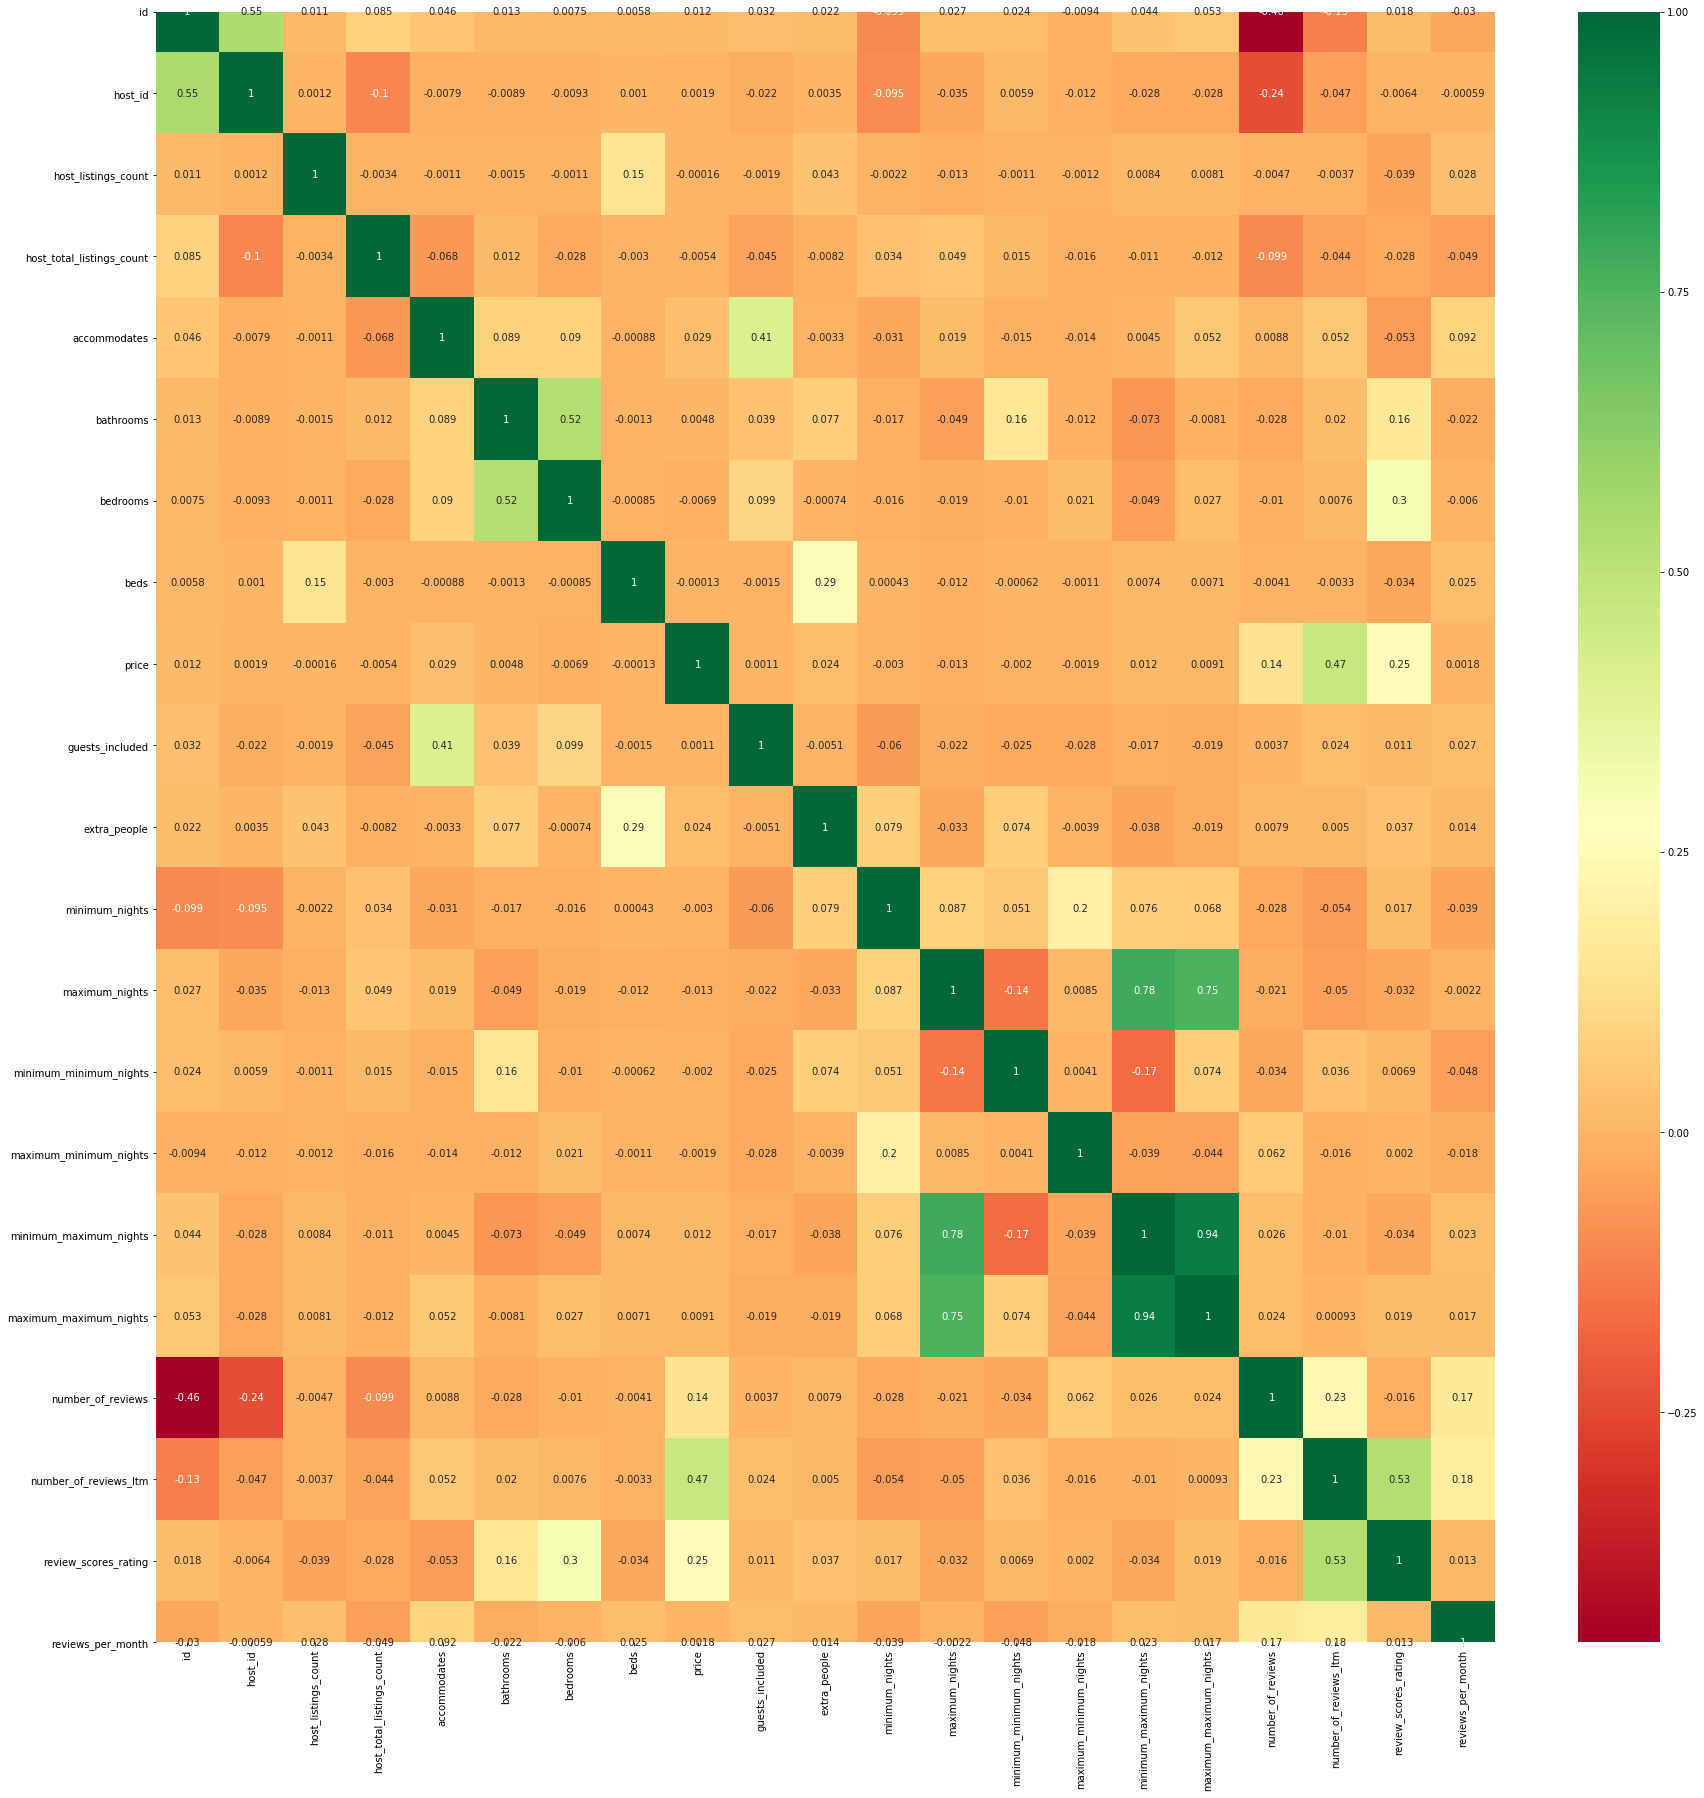

In [213]:
#find good features using correlation matrix heatmap
X = df.iloc[:, 0:29]
y = df["price"]

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g = sb.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [221]:
#feature selection
newDF = df[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

#convert float to int
newDF.accommodates = newDF.accommodates.astype(int)
newDF.bathrooms = newDF.bathrooms.astype(int)
newDF.beds = newDF.beds.astype(int)
newDF.guests_included = newDF.guests_included.astype(int)
newDF.extra_people = newDF.extra_people.astype(int)
newDF.minimum_nights = newDF.minimum_nights.astype(int)
newDF.minimum_minimum_nights = newDF.minimum_minimum_nights.astype(int)
newDF.maximum_maximum_nights = newDF.maximum_maximum_nights.astype(int)
newDF.number_of_reviews = newDF.number_of_reviews.astype(int)
newDF.number_of_reviews_ltm = newDF.number_of_reviews_ltm.astype(int)
newDF.review_scores_rating = newDF.review_scores_rating.astype(int)
newDF.reviews_per_month = newDF.reviews_per_month.astype(int)
newDF.price = newDF.price.astype(int)

newDF.info()

print(newDF.round(0).astype(int))
print(newDF.head(5))

newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 13 columns):
accommodates              13049 non-null int64
bathrooms                 13049 non-null int64
beds                      13049 non-null int64
guests_included           13049 non-null int64
extra_people              13049 non-null int64
minimum_nights            13049 non-null int64
minimum_minimum_nights    13049 non-null int64
maximum_maximum_nights    13049 non-null int64
number_of_reviews         13049 non-null int64
number_of_reviews_ltm     13049 non-null int64
review_scores_rating      13049 non-null int64
reviews_per_month         13049 non-null int64
price                     13049 non-null int64
dtypes: int64(13)
memory usage: 1.3 MB
       accommodates  bathrooms  beds  guests_included  extra_people  \
0                 1          1     1                1             2   
1                 2          1     2                1             2   
2                 2         

In [224]:
#no. 2 logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#prepare the training set
X = newDF
y = newDF["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the model
model = LogisticRegression()
model.fit(X_train, y_train) #train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [225]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [226]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   0    4    0    0    0]
 [   0 2603    0    0    0]
 [   0    1    0    0    0]
 [   0    1    0    0    0]
 [   0    1    0    0    0]]


In [227]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       1.00      1.00      1.00      2603
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           1.00      2610
   macro avg       0.20      0.20      0.20      2610
weighted avg       0.99      1.00      1.00      2610



In [212]:
#data cleansing
for i in df:
    print(i, df[i].dtypes)
    if df[i].isna().values.any() and df[i].dtypes != object:
        df[i] = df[i].fillna(df[i].median())

train, test = train_test_split(df, test_size=0.2)

id int64
host_id float64
host_name object
host_response_time object
host_response_rate object
host_acceptance_rate object
host_neighbourhood object
host_listings_count float64
host_total_listings_count float64
neighbourhood object
neighbourhood_cleansed object
property_type object
room_type object
accommodates int64
bathrooms int64
bedrooms float64
beds int64
price float64
guests_included int64
extra_people int64
minimum_nights int64
maximum_nights float64
minimum_minimum_nights int64
maximum_minimum_nights float64
minimum_maximum_nights float64
maximum_maximum_nights int64
number_of_reviews int64
number_of_reviews_ltm int64
review_scores_rating int64
reviews_per_month int64


In [ ]:
#convert some features from object to float
df['host_id'] = df['host_id'].astype(float)
